# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [1]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [3]:
salary = pd.read_csv('Position_Salaries.csv')
salary.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


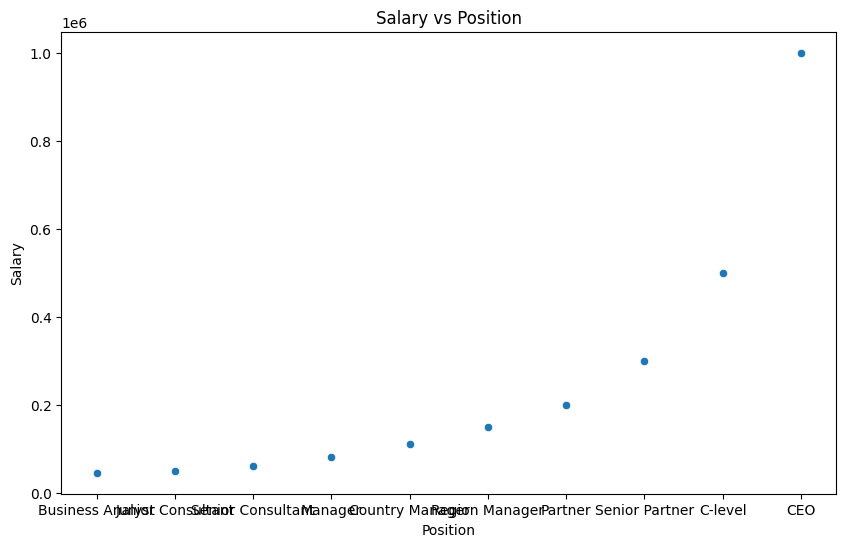

In [4]:
x=salary['Position'].values.reshape(-1,1)
y=salary['Salary'].values
def mse(y_actual, y_predicted):
    return np.mean((y_actual - y_predicted) ** 2)
print(salary.describe())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Position', y='Salary', data=salary)
plt.title('Salary vs Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * Yes
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * The job position is a independent variable,and salary is dependent variable, that is why simple linear regression model can be used to fit this data.
But when we look at the data the job position and salary doesn't appear to be linear,that is why i said the data won't be fit well when we use simple linear model.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= \frac{1}{n} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

Predicted Salary for Position 7.5: $328672.35


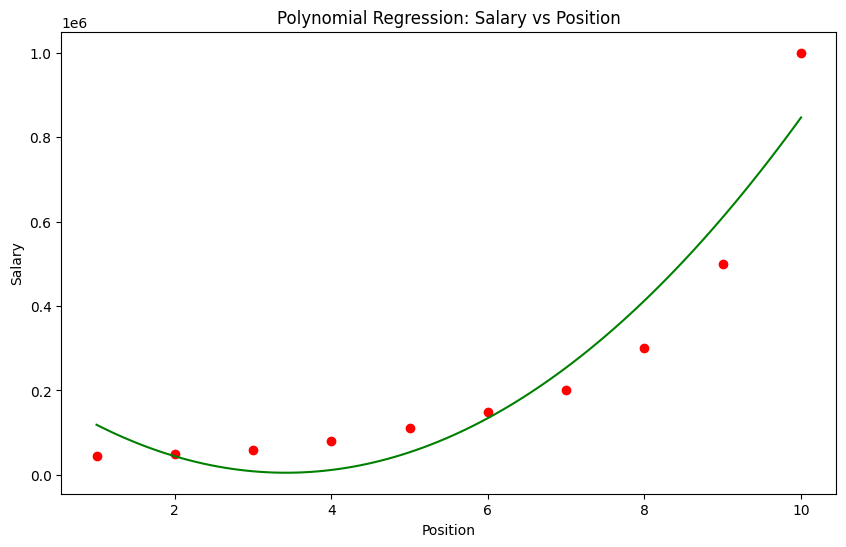

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
salary = pd.read_csv('Position_Salaries.csv')

position_mapping = {position: i for i, position in enumerate(salary['Position'].unique(), 1)}
salary['Position'] = salary['Position'].map(position_mapping)



x = salary['Position'].values.reshape(-1, 1)
y = salary['Salary'].values


x_pol = np.hstack((x, x**2))
x_pol = np.hstack((np.ones((x_pol.shape[0], 1)), x_pol))


coefficients = np.linalg.inv(x_pol.T.dot(x_pol)).dot(x_pol.T).dot(y)

def pol_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

level_new = 7.5
predicted_salary = pol_model(level_new)
print(f"Predicted Salary for Position {level_new}: ${predicted_salary:.2f}")

# Plotting the polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red')
x_plot = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_plot = pol_model(x_plot)
plt.plot(x_plot, y_plot, color='green')
plt.title('Polynomial Regression: Salary vs Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * It's very simple to use. We need a accurate predictions for our model. When the MSE decreases then the model will predict better.

**Derivatives of cost function:**
  - Derivative with respect to \(w_1\)
  (weight of \(x^2\)):
  $$
  \frac{\partial MSE}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right) x_{1i}^2
  $$
  - Derivative with respect to \(w_2\) (weight of \(x\)):
  $$
  \frac{\partial MSE}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right) x_{1i}
  $$
  - Derivative with respect to \(b\) (bias):
  $$
  \frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right)
  $$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$ Δw_1 = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right) x_{1i}^2 \
       $$ $$Δw_2 = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right) x_{1i}$$
       $$ Δb = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right)$$

## Implementation of the model

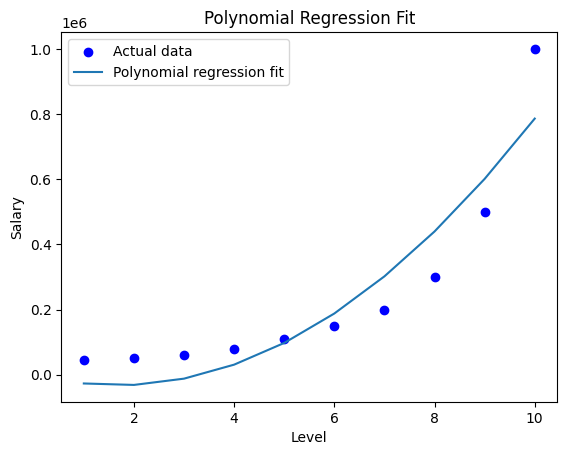

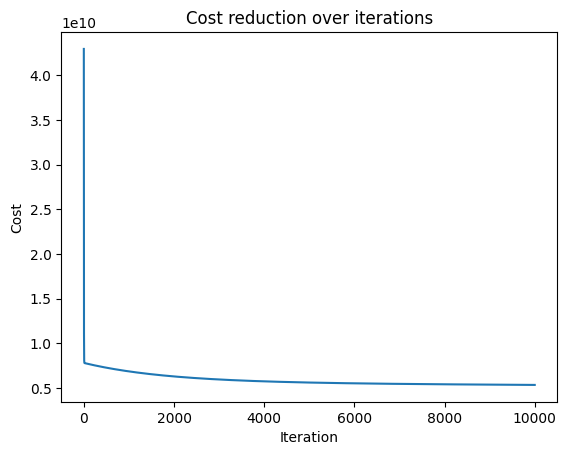

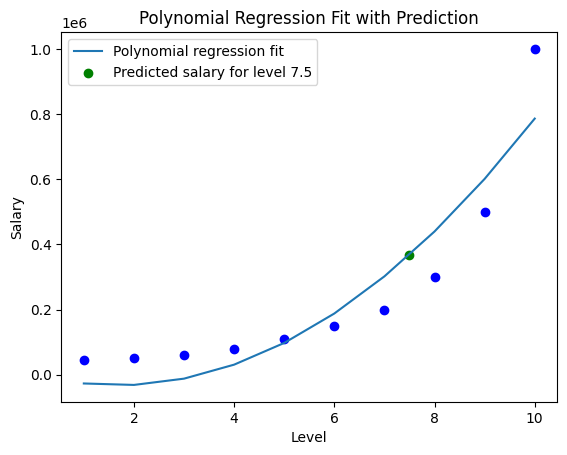

Predicted Salary for level 7.5: $367,915.23


In [13]:

# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(x, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(x, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(x, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(x, coefficients)
    d_coefficients = (1/n) * np.dot(x.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(x, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(x, y, coefficients)
        cost_history[i] = compute_cost(x, y, coefficients)
    return coefficients, cost_history

# Load the dataset
data=pd.read_csv(r"Position_Salaries.csv")
x = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
x_pol = np.hstack((np.ones((x.shape[0], 1)), x, x**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(x_pol, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(x_pol, coefficients)
# Plot polynomial model
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_x = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_x, coefficients)

# Plot with the new prediction
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")


### Answer the following

* What is learning rate?
> * It is the parameter that regulates the number of steps executed in gradient descent optimization.
* What will happen if the learning rate is too large?
> * It may not converge to minima if it is too large, as the step size will be high.It will exceed the minimum, which will cause divergence or oscillations near the ideal values.

* What will happen if the learning rate is too small?
> * Although there will be a modest convergence, the training duration will be excessively prolonged.

* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> Change the formula from: $$ y = w_1 x^2 + w_2 x + b$$ to include a term for the cubic power of x. $$y = w_3 x^3 + w_1 x^2 + w_2 x + b $$

 w_3 Gradient computation: A novel gradient computation for w_3 is presented here:$$
 \frac{\partial MSE}{\partial w_3} = -\frac{2}{n} \sum_{i=1}^{n} \left(y_i - (w_3 x_i^3 + w_1 x_i^2 + w_2 x_i + b)\right) x_i^3 $$

 Update Rule for w_3:
Update w_3 in each iteration:
 w_3 :$$w_3= w_3 - \alpha \frac{\partial MSE}{\partial w_3} $$


 Initialization: Set w_3's initial value to resemble that of the other parameters.
